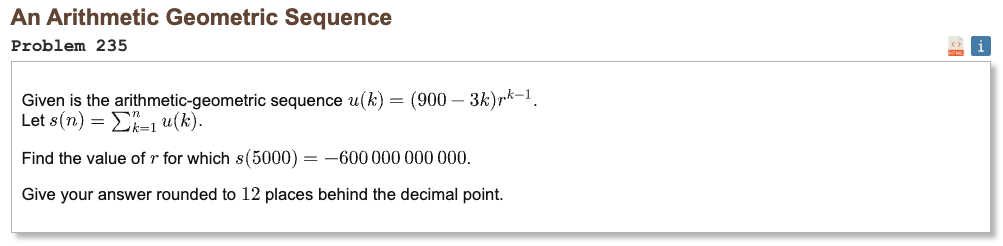

## Initial approach

* rewrite the sum as two simpler sums, one for r^{k-1} and one for k \cdot r^{k-1}
* use the closed form geometric series for \sum r^{k-1} so you do not loop 5000 times
* use the closed form for \sum k r^{k-1} so the whole expression becomes fast and stable
* build a function S(r) that returns the sequence sum for a given r
* note that at r=1 the sum is only about -3.3 \times 10^7, so to reach -6 \times 10^{11} you need r slightly bigger than 1
* bracket the answer between two nearby values where the sum is above and below the target
* run a binary search on r until the interval is tiny, then round to 12 decimals
* use math for powers and basic operations

In [1]:
import math

def S(r, n=5000):
    if abs(r - 1.0) < 1e-15:
        return 900 * n - 3 * (n * (n + 1) // 2)
    rn = r ** n
    d = 1.0 - r
    a = (1.0 - rn) / d
    b = (1.0 - (n + 1) * rn + n * rn * r) / (d * d)
    return 900.0 * a - 3.0 * b

def solve():
    target = -600000000000.0
    lo = 1.0
    hi = 1.01
    while S(hi) > target:
        hi = 1.0 + (hi - 1.0) * 2.0

    for _ in range(120):
        mid = (lo + hi) / 2.0
        if S(mid) > target:
            lo = mid
        else:
            hi = mid

    r = (lo + hi) / 2.0
    return f"{r:.12f}"

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 1.002322108633
CPU times: user 634 μs, sys: 94 μs, total: 728 μs
Wall time: 704 μs
